# BERNOULLINB FOREST CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('AIR_DATA.csv')
del df['StationId']
del df['Datetime']
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [3]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df['AQI_Bucket'].unique()

array([nan, 'Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good',
       'Severe'], dtype=object)

In [5]:
df=df.dropna()

In [6]:
# Assuming 'obj' is a list or array
# mapping = {'Moderate': 'Increased_Allergy_Symptoms', 'Poor': 'Neurological_Effects', 'Very Poor': 'Elderly_and_Children_Vulnerability','Satisfactory':'Minimal_Health_Risks','Good':'Low_Health_Risks','Severe':'Cardiovascular_Complications}
# Adding the integer values to the DataFrame
mapping = {'Moderate': 'Increased_Allergy_Symptoms', 'Poor': 'Neurological_Effects', 'Very Poor': 'Elderly_and_Children_Vulnerability', 'Satisfactory': 'Minimal_Health_Risks', 'Good': 'Low_Health_Risks', 'Severe': 'Cardiovascular_Complications'}

df['AQI_Bucket'] = df['AQI_Bucket'].map(mapping)

In [7]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
16,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Increased_Allergy_Symptoms
17,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Increased_Allergy_Symptoms
18,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Increased_Allergy_Symptoms
21,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Increased_Allergy_Symptoms
22,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Increased_Allergy_Symptoms


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['AQI_Bucket']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
2    88654
4    69531
3    22852
5    11704
1     9147
0     1805
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203693 entries, 16 to 2543908
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PM2.5       203693 non-null  float64
 1   PM10        203693 non-null  float64
 2   NO          203693 non-null  float64
 3   NO2         203693 non-null  float64
 4   NOx         203693 non-null  float64
 5   NH3         203693 non-null  float64
 6   CO          203693 non-null  float64
 7   SO2         203693 non-null  float64
 8   O3          203693 non-null  float64
 9   Benzene     203693 non-null  float64
 10  Toluene     203693 non-null  float64
 11  Xylene      203693 non-null  float64
 12  AQI         203693 non-null  float64
 13  AQI_Bucket  203693 non-null  int32  
dtypes: float64(13), int32(1)
memory usage: 22.5 MB


In [11]:
x1 = df.drop(labels='AQI_Bucket', axis=1)
y1 = df.loc[:,'AQI_Bucket']

In [12]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2: 88654, 4: 69531, 3: 22852, 5: 11704, 1: 9147, 0: 1805})
OVER SAMPLING DATA COUNT  :  Counter({2: 88654, 5: 88654, 1: 88654, 4: 88654, 3: 88654, 0: 88654})


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [14]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [15]:
from sklearn.naive_bayes import BernoulliNB

In [17]:
RFC = BernoulliNB()
RFC.fit(x_train,y_train)

BernoulliNB()

In [18]:
predicted = RFC.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF BERNOULLINNB  :\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BERNOULLINNB  :


 [[    0 14920    59  2751     0     0]
 [    0 15096    38  2597     0     0]
 [    0 12557   515  4561    98     0]
 [    0 10264   179  7238    50     0]
 [    0 11302   351  5942   136     0]
 [    0 14424   325  2964    18     0]]


In [20]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF BERNOULLINNB IS :",a*100)

THE ACCURACY SCORE OF BERNOULLINNB IS : 21.60548949569958


In [21]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF BERNOULLINNB IS :",hl*100)

THE HAMMING LOSS OF BERNOULLINNB IS : 78.39451050430041


In [22]:
from sklearn.metrics import classification_report
P = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT OF BERNOULLINNB IS :\n\n",P)

THE CLASSIFICATION REPORT OF BERNOULLINNB IS :

               precision    recall  f1-score   support

           0       0.00      0.00      0.00     17730
           1       0.19      0.85      0.31     17731
           2       0.35      0.03      0.05     17731
           3       0.28      0.41      0.33     17731
           4       0.45      0.01      0.02     17731
           5       0.00      0.00      0.00     17731

    accuracy                           0.22    106385
   macro avg       0.21      0.22      0.12    106385
weighted avg       0.21      0.22      0.12    106385



THE CONFUSION MATRIX SCORE OF BERNOULLINNB:


[[    0 14920    59  2751     0     0]
 [    0 15096    38  2597     0     0]
 [    0 12557   515  4561    98     0]
 [    0 10264   179  7238    50     0]
 [    0 11302   351  5942   136     0]
 [    0 14424   325  2964    18     0]]


DISPLAY CONFUSION MATRIX : 




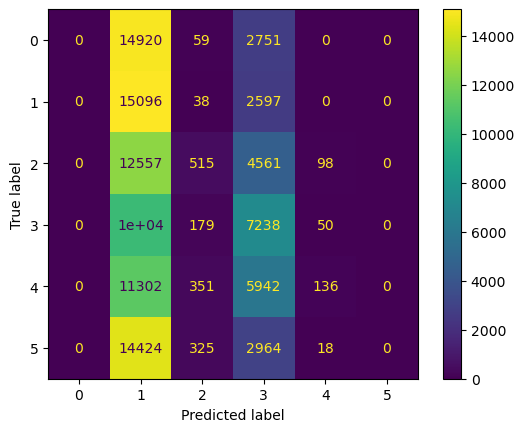

In [23]:
cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF BERNOULLINNB:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()


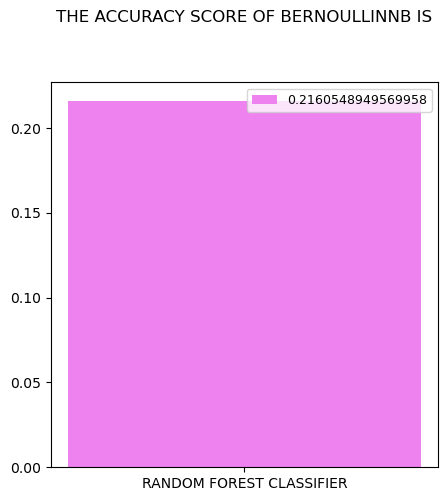

In [24]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("VIOLET"))
    plt.title("THE ACCURACY SCORE OF BERNOULLINNB IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()